In [20]:
from datasets import load_dataset

train_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                            split="train", # ["train", "test"]
                            cache_dir="~/.cache/huggingface",
                            )

/home/ec2-user/anaconda3/envs/rank3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
train_dataset

Dataset({
    features: ['query_id', 'query_md5', 'query', 'query_length', 'n', 'url_md5', 'text_md5', 'title', 'abstract', 'query_document_embedding', 'click', 'position', 'media_type', 'displayed_time', 'serp_height', 'slipoff_count_after_click', 'bm25', 'bm25_title', 'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short', 'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length', 'title_length', 'abstract_length'],
    num_rows: 1779017
})

In [22]:
train_dataset['bm25'][0]

[37.58316421508789,
 36.20572280883789,
 56.07870864868164,
 70.85820007324219,
 52.38069152832031,
 47.444210052490234,
 51.77769088745117,
 41.325138092041016]

In [6]:
train_dataset['tf_idf'][0]

[25.439960479736328,
 20.177860260009766,
 41.639854431152344,
 35.50246810913086,
 38.605186462402344,
 25.439960479736328,
 39.025325775146484,
 22.449565887451172]

In [1]:
import torch
from src.bert import BertModel, BertReward
from transformers.models.bert.configuration_bert import BertConfig

config = BertConfig()

config.vocab = 100
config.num_labels = 1 # regression output
config.problem_type = "classification"
config.max_position_embeddings = 50

# if args.use_doc_feat:
# 	# self.config.doc_feat_len=0
# 	self.config.hidden_size+=12

reward_model = BertReward(config)

mname = "dfeat_un"
checkpoint = torch.load('../outputs/'+mname+'/checkpoint35.pth', map_location='cpu')

from datasets import load_dataset

train_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                            split="train", # ["train", "test"]
                            cache_dir="~/.cache/huggingface",
                            )

/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/jax/_src/xla_bridge.py", line 430, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/jax_plugins/xla_cuda12/__init__.py", line 78, in initialize
    options = xla_client.generate_pjrt_gpu_plugin_options()
AttributeError: module 'jaxlib.xla_client' has no attribute 'generate_pjrt_gpu_plugin_options'
/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/datasets/load.py:1486: FutureWarning: The repository for philipphager/baidu-ultr_baidu-mlm-ctr 

In [28]:
from src.data import collate_fn
from torch.utils.data import DataLoader
import tqdm

train_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                        split="train", # ["train", "test"]
                        cache_dir="~/.cache/huggingface",
                        )

test_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                        split="test", # ["train", "test"]
                        cache_dir="~/.cache/huggingface",
                        )

train_dataloader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=64,
                                num_workers=2, pin_memory=True)
    
test_dataloader = DataLoader(test_dataset, collate_fn=collate_fn, batch_size=64,
                                num_workers=2)

In [29]:
max_pos = 0
for batch in tqdm.tqdm(iter(train_dataloader)):
    feat = batch['query_document_embedding']
    pos_idx = batch['position']
    max_pos = max(max_pos, max(batch['n']))
    #out = reward_model(inputs_embeds=feat, position_ids=pos_idx)

print ('max_pos: ', max_pos)

  0%|          | 0/27798 [00:00<?, ?it/s]

100%|██████████| 27798/27798 [26:31<00:00, 17.47it/s]

max_pos:  21


In [26]:
batch['n']

array([ 8,  8,  9,  8, 13,  8,  7,  8,  9,  6,  8,  9,  7,  9,  9,  8,  9,
        7,  8,  8,  9,  9,  9,  8,  9,  9,  9,  9,  9,  6,  8,  8,  8,  8,
        8,  8,  7,  8,  8,  8,  8,  8, 11,  9,  7,  6,  9,  9,  9, 10,  9,
        8,  6,  6,  8,  8,  9,  8,  9,  9, 10,  9,  9,  8])

In [7]:
a['']

dict_keys(['n', 'query_document_embedding', 'click', 'position', 'bm25', 'bm25_title', 'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short', 'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length', 'title_length', 'abstract_length', 'mask'])

In [2]:
import torch
import os

In [4]:
torch.save(torch.tensor([1,2,3]),os.path.join('__pycache__','def'))

In [34]:
#from tsnecuda import TSNE
import torch
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE()

#a = torch.load(saved_path+model+'/saved_cls')
#b = torch.load(saved_path+model+'/saved_label')

In [44]:
import torch

def plot(model, dim=780, n_viz=1000, title='GT_labels',saved_path='../outputs/'):
    a = torch.load(saved_path+model+'/saved_tensor/saved_cls')
    b = torch.load(saved_path+model+'/saved_tensor/saved_label')
    c = torch.load(saved_path+model+'/saved_tensor/saved_prob')

    a1 = tsne.fit_transform(a[0:n_viz].view(-1,dim))
    #plt.figure(figsize=(8, 6))

    fig, ax = plt.subplots(1, 3, figsize=(24,8), dpi=220)
    #fig.suptitle('Common Title for All Subplots', fontsize=30)
    fig.text(0.04, 0.6, 'sr_df_per0.5\nval_acc: '+str(76.3)+'\n KL_div: '+str(0.34)+'\n KL_div: '+str(0.87)+'\n l1: '+str(0.43)+'\n l2: '+str(0.34),
              va='center', fontsize=16, fontweight='bold')
    plt.subplots_adjust(wspace=0.05, hspace=0.1)

    scatter = []
    flag = 0

    for i in ax[:-1]:
        scatter.append(i.scatter(a1[:, 0], a1[:, 1], c=b[0:n_viz].view(-1), cmap='jet', s=50, alpha=0.7))

    # Add a colorbar
        #if flag == 2:
        plt.colorbar(scatter[-1], shrink=0.8)
        # flag+=1

        i.set_title("t-SNE : "+title)
        #i.xlabel("t-SNE Component 1")
        #i.ylabel("t-SNE Component 2")
        i.plot()
        #i.set_aspect('equal')

    ax[2].hist2d(range(len(c[0:n_viz].view(-1))), c[0:n_viz].view(-1), bins=20)
    ax[2].set_title("Score distibution")
    ax[2].plot()
    #ax[2].set_aspect('equal')
    #plt.tight_layout()

    plt.savefig('test.jpg', bbox_inches='tight', pad_inches=0.1)

In [36]:
import torch
import torch.nn.functional as F
b = torch.load('../outputs/ultr_ips/saved_tensor/saved_prob')

/tmp/ipykernel_87180/797015881.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  b = torch.load('../outputs/ultr_ips/saved_tensor/saved_prob')


In [37]:
def distance_between_probabilities(prob1, prob2, distance_type='kl'):
    
    if distance_type == 'kl':
        # Ensure non-zero values to avoid log(0) in KL divergence
        prob1 = prob1 + 1e-8
        prob2 = prob2 + 1e-8
        kl_div = F.kl_div(prob1.log(), prob2, reduction='batchmean')  # KL Divergence
        return kl_div
    
    elif distance_type == 'js':
        # Jensen-Shannon Divergence (symmetrized version of KL)
        prob1 = prob1 + 1e-8
        prob2 = prob2 + 1e-8
        m = 0.5 * (prob1 + prob2)
        js_div = 0.5 * (F.kl_div(prob1.log(), m, reduction='batchmean') + F.kl_div(prob2.log(), m, reduction='batchmean'))
        return js_div
    
    elif distance_type == 'l2':
        # L2 Distance (Euclidean distance)
        l2_dist = torch.norm(prob1 - prob2, p=2)
        return l2_dist
    
    elif distance_type == 'l1':
        # L1 Distance (Manhattan distance)
        l1_dist = torch.norm(prob1 - prob2, p=1)
        return l1_dist
    
    elif distance_type == 'mse':
        # L1 Distance (Manhattan distance)
        mse = F.mse_loss(prob1, prob2)
        return mse

In [38]:
distance_between_probabilities(b,torch.rand_like(b))

tensor(0.2269)

/tmp/ipykernel_39484/4020974925.py:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


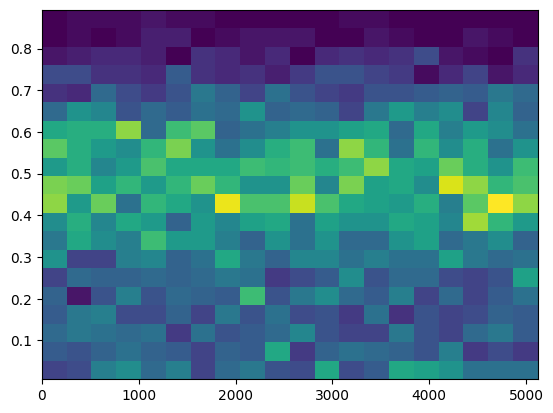

In [10]:
from scipy.interpolate import make_interp_spline
from scipy.ndimage.filters import gaussian_filter1d
x,y = range(1024*5),b[0:5].view(-1)
#spl = make_interp_spline(x,y)
#y = gaussian_filter1d(y, sigma=5)
#plt.plot(x,y, linestyle='-')
plt.hist2d(x,y,bins=20);
#plt.bar(x,y)

In [41]:
y[0:20]

tensor([0.0428, 0.5399, 0.4271, 0.5179, 0.7636, 0.4575, 0.5000, 0.3253, 0.0695,
        0.4671, 0.5682, 0.4858, 0.4338, 0.4523, 0.6525, 0.0716, 0.5397, 0.6152,
        0.5102, 0.4770])

/tmp/ipykernel_87180/4186374076.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load(saved_path+model+'/saved_tensor/saved_cls')
/tmp/ipykernel_87180/418637407

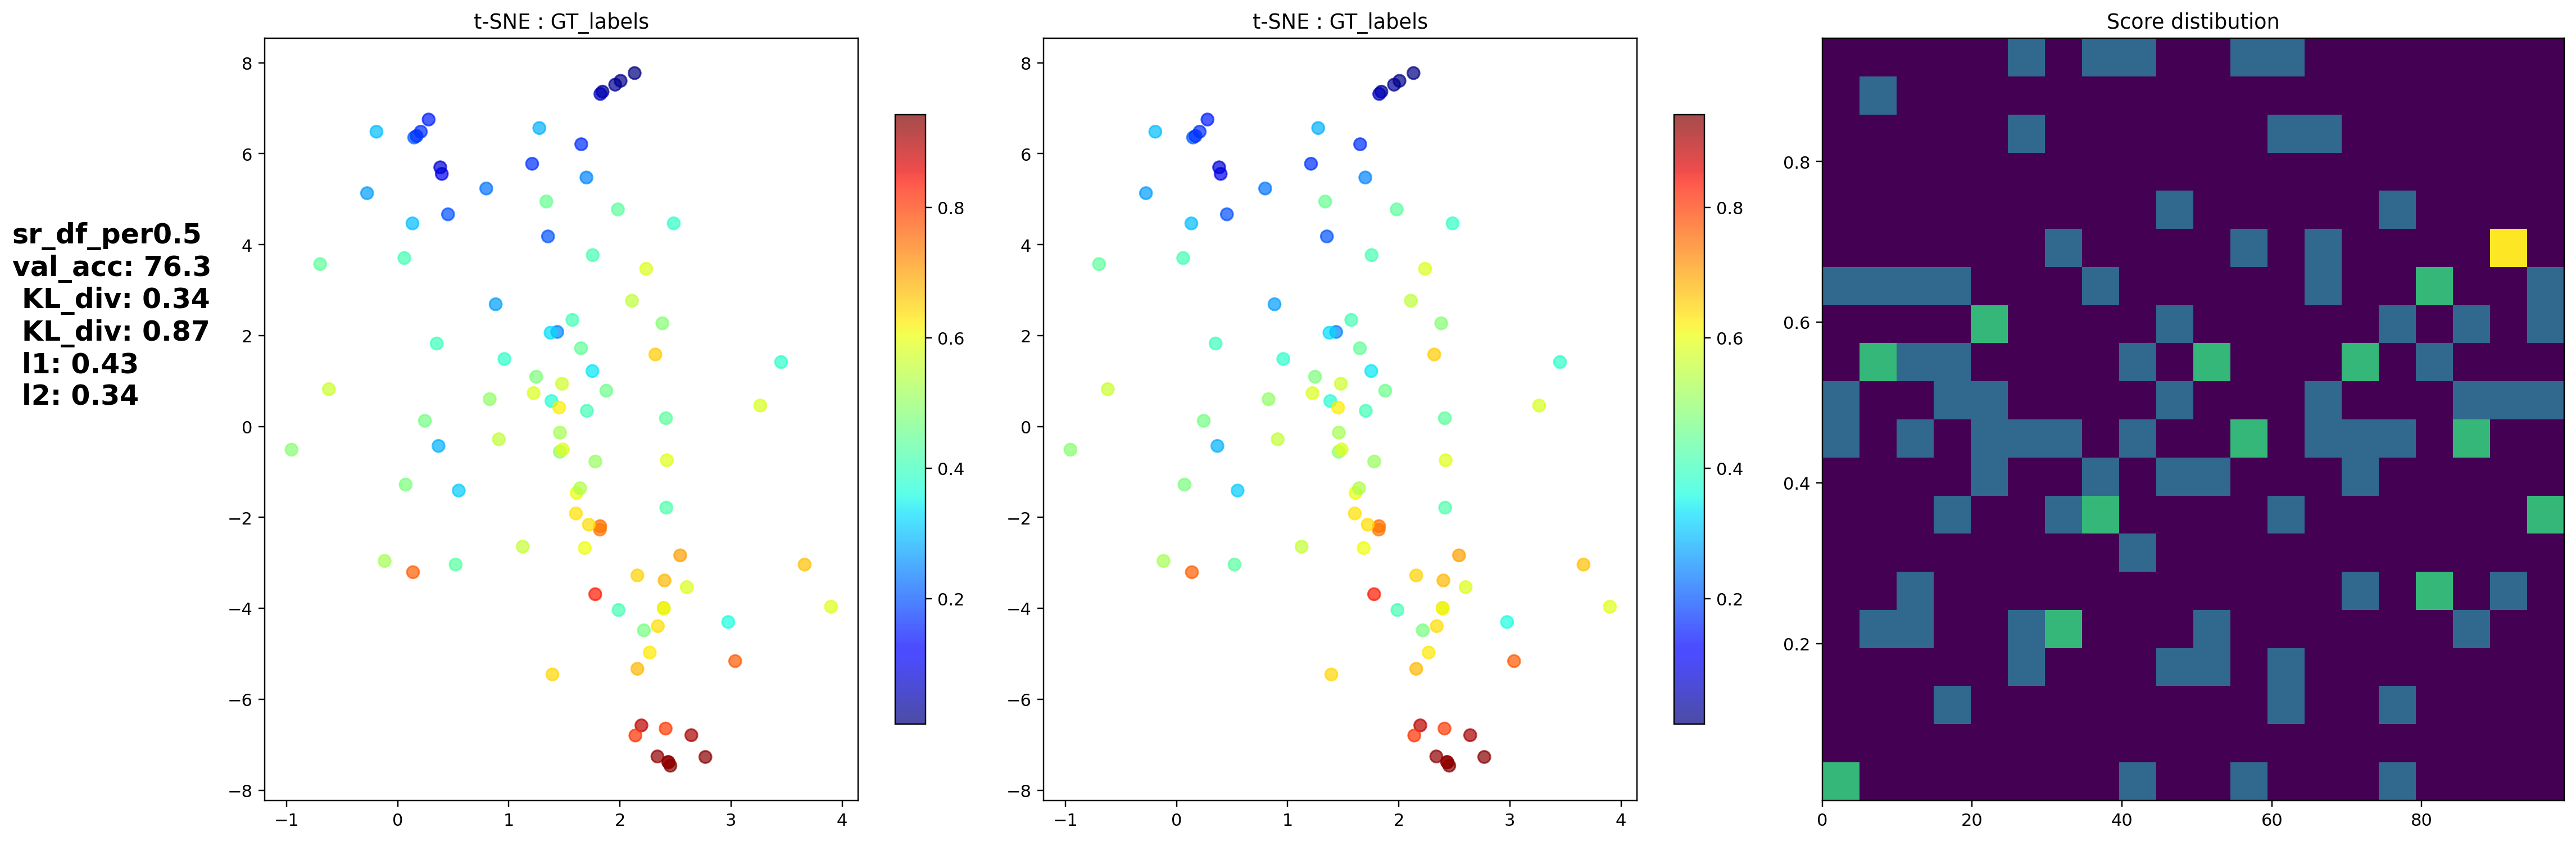

In [45]:
model='ultr_ips'
plot(model,n_viz=100)

In [ ]:
model='ep40_drp15_wd4'
plot(model, dim=768, n_viz=50, saved_path='../outputs/')

In [7]:
model='sr_nodf'
#plot(model, dim=768)

/tmp/ipykernel_92741/1131402897.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load(saved_path+model+'/saved_cls')
/tmp/ipykernel_92741/1131402897.py:5: Futur

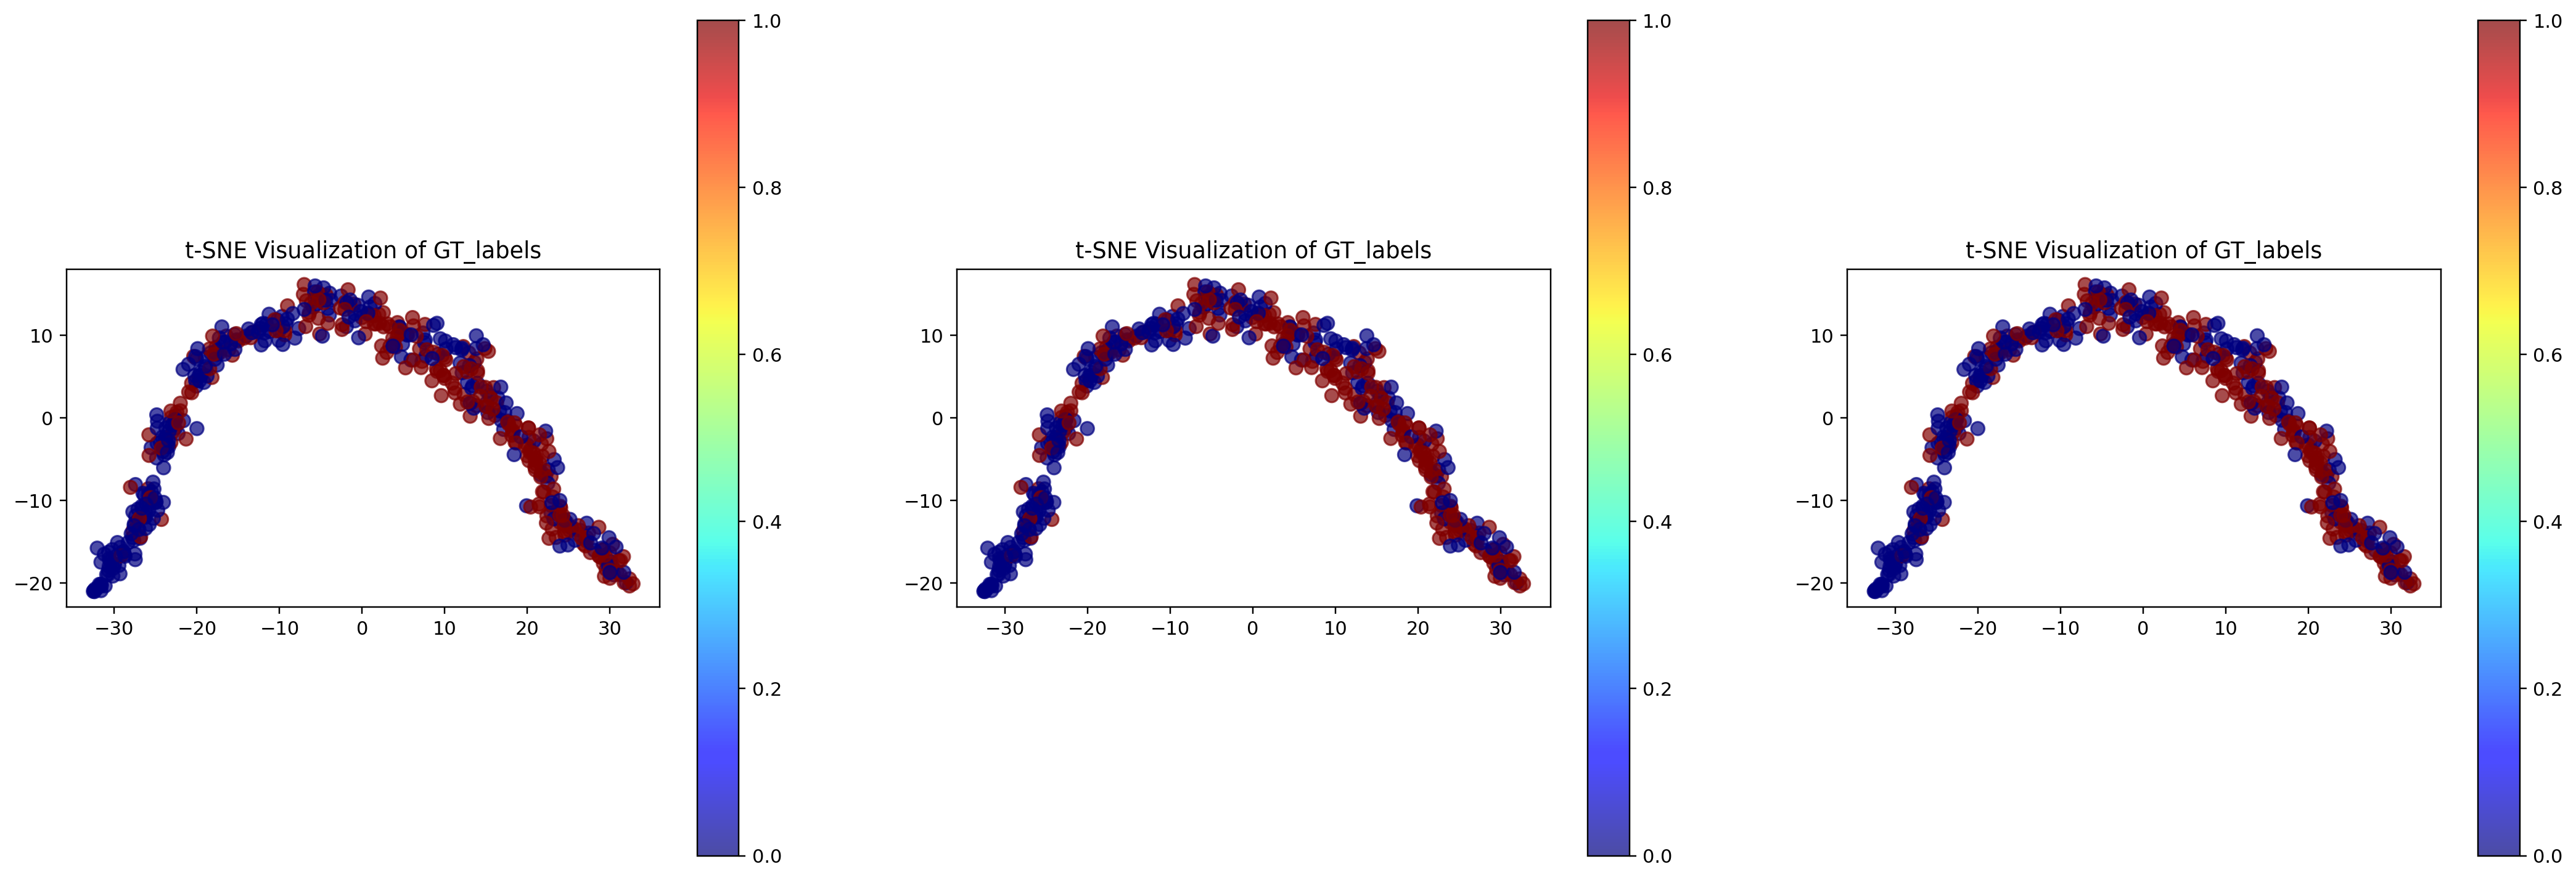

In [14]:
#fig, ax = plt.subplots(1, 3, figsize=(14,6), dpi=220)

plot(model=model,dim=768)

In [5]:
ax[0].scatter

<bound method Axes.scatter of <Axes: >>

In [17]:
a = torch.load('../cf_ranking/outputs/'+model+'/saved_cls')
b = torch.load('../cf_ranking/outputs/'+model+'/saved_label')

/tmp/ipykernel_109499/2676748144.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load('../cf_ranking/outputs/'+model+'/saved_cls')
/tmp/ipykernel_109499/267674

In [18]:
a.shape

torch.Size([290, 512, 780])

/tmp/ipykernel_109499/2011973477.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load('../cf_ranking/outputs/'+model+'/saved_cls')
/tmp/ipykernel_109499/201197

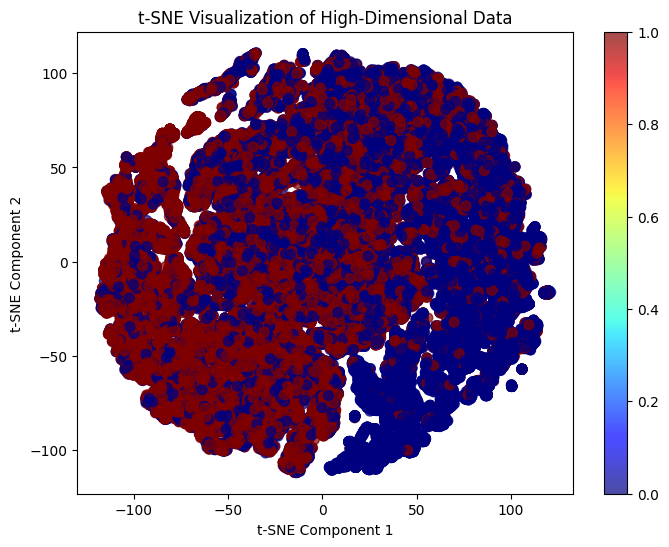

In [21]:
model='sr_df'
plot(model,n_viz=200)

In [6]:
from datasets import load_dataset
from torch.utils.data import DataLoader
from bbm.src.model import CrossEncoder
from src.data import collate_fn
import numpy as np
import torch
import pandas as pd
from collections import defaultdict
import tqdm

ModuleNotFoundError: No module named 'src.model'

In [8]:
batch_size = 8
dataset = load_dataset(
    "philipphager/baidu-ultr_uva-mlm-ctr",
    name="clicks",
    split="test",
    trust_remote_code=True,
)

click_loader = DataLoader(
    dataset,
    batch_size=batch_size,
    collate_fn=collate_fn,
    num_workers=0,
)

# click_loader1 = DataLoader(
#     dataset,
#     batch_size=batch_size,
#     collate_fn=collate_click_fn,
# )

# model = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_naive-pointwise")
# model1 = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_dla")
# model2 = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_ips-listwise")
# model4 = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_twotower")

In [11]:
len(click_loader)/8

9280.25

In [10]:
batch1 = next(iter(click_loader))

# new_batch = {'tokens':batch1['tokens'].reshape(batch_size*9,128),
#              'attention_mask':batch1['attention_mask'].reshape(batch_size*9,128),
#              'token_types':batch1['token_types'].reshape(batch_size*9,128)}
# out_c = model(new_batch)
# out_c1 = model1(new_batch)
# out_c2 = model(new_batch)

# Use model only for relevance prediction, e.g., for evaluation:
# out_r = model.predict_relevance(batch2)

In [21]:
a1 = torch.tensor(batch1['click'])
(0.8 + a1.sum(dim=1) * 0.05)*torch.clamp(a1.sum(dim=1), max=1.0)

tensor([0.9000, 0.8500, 0.8500, 0.0000, 0.0000, 0.0000, 0.8500, 0.9000])

In [20]:
batch1['click']

array([[0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [31]:
pred = np.array(out_c.click)
avg_click = pred.reshape(16,9)

In [34]:
batch1['click_mod'] = avg_click

In [56]:
batch_out = {}
for i,j in batch1.items():
    batch_out[i] = j.tolist()

In [57]:
df = pd.DataFrame(batch_out)
df.to_feather('out.feather')

In [12]:
batch_out = defaultdict(lambda: [])
for idx, batch in tqdm.tqdm(enumerate(click_loader)):
    #if idx < 5000:
    #    continue
    #print(idx)
    row,col = batch['tokens'].shape[0], batch['tokens'].shape[1] 
    new_batch = {'tokens':batch['tokens'].reshape(row*col,128),
             'attention_mask':batch['attention_mask'].reshape(row*col,128),
             'token_types':batch['token_types'].reshape(row*col,128)}
    out_c = model(new_batch)
    pred = np.array(out_c.click).reshape(row,col)
    batch['click_mod'] = pred

    for i,j in batch.items():
        batch_out[i].extend(j.tolist())
        #batch_out['click_mod'].extend(pred.tolist())
    #if idx > 10:
    #    break
df = pd.DataFrame(batch_out)
df.to_feather('out.feather')

0it [00:00, ?it/s]

215it [02:18,  1.85it/s]

In [1]:
import pandas as pd

In [20]:
a = pd.read_feather('../../data/naive-pointwise_train1.feather')

In [21]:
a.keys()

Index(['tokens', 'token_types', 'attention_mask', 'n',
       'query_document_embedding', 'click', 'position', 'bm25', 'bm25_title',
       'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short',
       'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length',
       'title_length', 'abstract_length', 'mask', 'click_mod'],
      dtype='object')

In [23]:
a['click'][85000]

array([1, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
27796*8

222368

In [58]:
pos = torch.tensor(list(range(10))).float()
delta = 1.0
weight = torch.tensor(10*[delta])
torch.multinomial(pos, 10, replacement=False)

tensor([8, 9, 7, 6, 5, 4, 2, 3, 1, 0])

In [71]:
int(len(pos)*0.6)

6

In [11]:
def sample_without_replacement_with_prob(delta, pos):
    weights = torch.ones_like(pos)
    remaining_idx = []

    #print('pos', pos)

    if delta*len(pos)<1:
        idx = torch.multinomial(pos, len(pos), replacement=False)
        return pos[idx]
    
    delta_sample_idx = torch.multinomial(pos,int(delta*len(pos)), replacement=False)
    #print ('retaining', pos[delta_sample_idx])
    weights[delta_sample_idx] = 0
    #remaining_idx = len(pos) - int(delta*len(pos))

    for i,j in enumerate(pos):
        if j not in pos[delta_sample_idx]:
            remaining_idx.append(i)

    #print ('perturbing', remaining_idx)

    d_pos = pos.clone()

    for i in remaining_idx:
        # Normalize weights to ensure they sum to 1
        normalized_weights = weights / weights.sum()

        # Sample one index based on normalized weights
        if weights.sum() == 0:
            return d_pos
        
        sampled_index = torch.multinomial(normalized_weights, 1).item()

        print (i, sampled_index, normalized_weights)

        d_pos[sampled_index] = pos[i]

        # Set the weight of the sampled index to 0 for the next iteration
        weights[sampled_index] = 0

    return d_pos

def sample_swap(pos, click=None, fn='rand'):
    
    def swap(pos, idx):    
        temp = pos[idx].clone()
        pos[idx] = pos[-1]
        pos[-1] = temp
        return pos
    
    if fn == 'rand':
        return swap(pos, idx=0)
    if click.sum()>0:
        indices = (click == 1).nonzero()
        if fn=='first_click_bot':
            idx = indices[0].item()
        elif fn=='first_click_top':
            idx = indices[-1].item()
        return swap(pos, idx)
        
    return pos


In [280]:
pos = torch.tensor([2,4,5,7,8,91,21,1]).float()
delta = 1.0
sample_without_replacement_with_prob(delta=delta,pos=pos)

pos tensor([ 2.,  4.,  5.,  7.,  8., 91., 21.,  1.])
retaining tensor([ 1.,  2., 91., 21.,  8.,  7.,  5.,  4.])
perturbing []


tensor([ 2.,  4.,  5.,  7.,  8., 91., 21.,  1.])

In [10]:
import torch
pos = torch.tensor([2,4,5,7,8,91,21,1]).float()
sample_swap(pos)

tensor([ 1.,  4.,  5.,  7.,  8., 91., 21.,  2.])

In [1]:
from PIL import Image

def merge_images(image_paths, output_path, direction="horizontal"):

    images = [Image.open(path) for path in image_paths]
    widths, heights = zip(*(i.size for i in images))

    if direction == "horizontal":
        total_width = sum(widths)
        max_height = max(heights)
        new_image = Image.new('RGB', (total_width, max_height))

        x_offset = 0
        for image in images:
            new_image.paste(image, (x_offset, 0))
            x_offset += image.size[0]

    elif direction == "vertical":
        max_width = max(widths)
        total_height = sum(heights)
        new_image = Image.new('RGB', (max_width, total_height))

        y_offset = 0
        for image in images:
            new_image.paste(image, (0, y_offset))
            y_offset += image.size[1]

    else:
        raise ValueError("Invalid direction. Choose 'horizontal' or 'vertical'")

    new_image.save(output_path)

In [46]:
fname = '../cf_ranking/outputs/sr_df/test.jpg'
m1 = 6*[fname]

In [48]:
merge_images(m1,output_path='../cf_ranking/outputs/sr_df/merge.jpg', direction="vertical")

In [6]:
import glob

f = glob.glob('../cf_ranking/outputs/sr_df/figs/*')

In [7]:
f.sort()

In [8]:
f

['../cf_ranking/outputs/sr_df/figs/org_viz.jpg',
 '../cf_ranking/outputs/sr_df/figs/per_0.2_viz.jpg',
 '../cf_ranking/outputs/sr_df/figs/swap_bot_viz.jpg',
 '../cf_ranking/outputs/sr_df/figs/swap_rand_viz.jpg',
 '../cf_ranking/outputs/sr_df/figs/swap_top_viz.jpg']

In [9]:
merge_images(f,output_path='../cf_ranking/outputs/sr_df/eval_viz.jpg', direction="vertical")

In [39]:
c

'b'

/tmp/ipykernel_4132/1658994981.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0].scatter(x, y, cmap='jet', s=50, alpha=0.7)


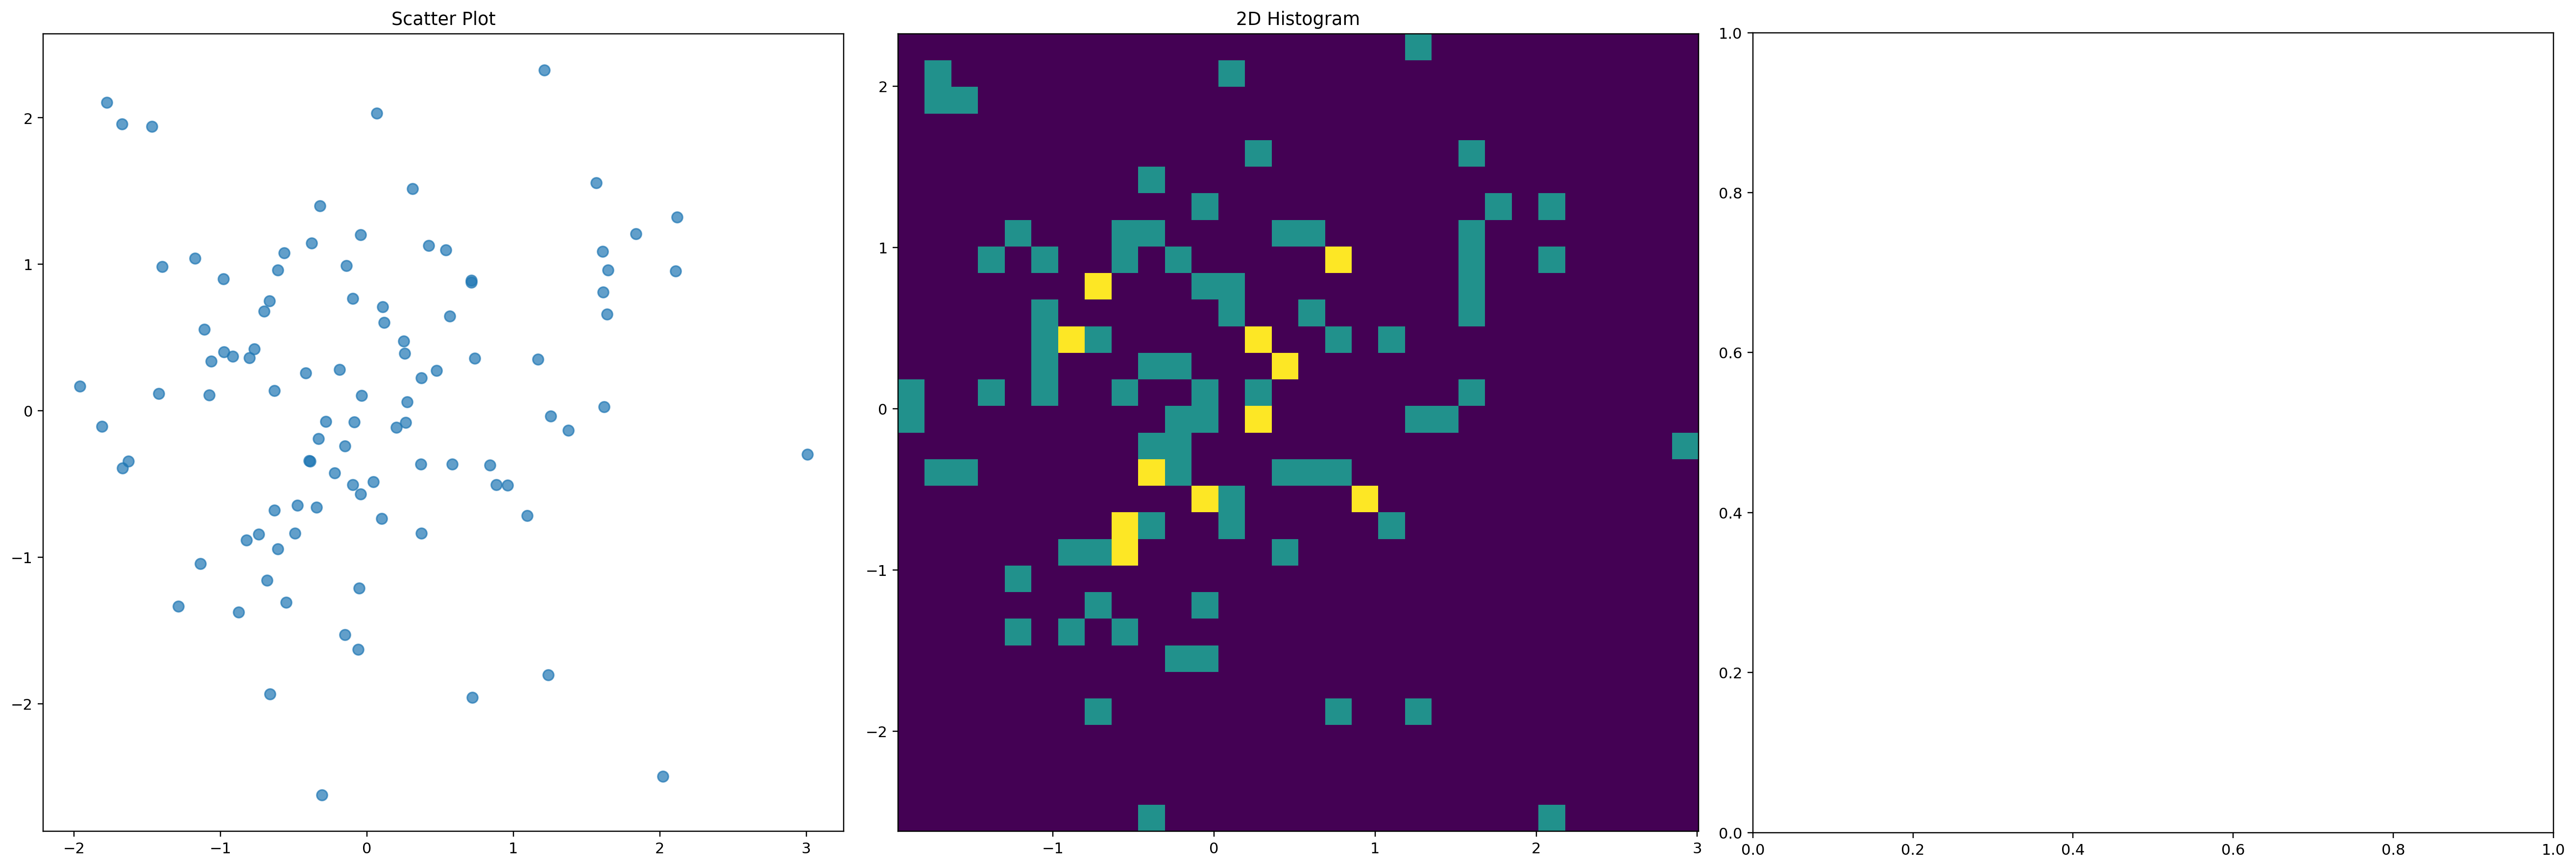

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.random.randn(100)
y = np.random.randn(100)

# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(24,8), dpi=220)

# Scatter plot
axs[0].scatter(x, y, cmap='jet', s=50, alpha=0.7)
axs[0].set_title('Scatter Plot')
axs[0].set_aspect('equal')  # Set equal aspect ratio

# 2D histogram
axs[1].hist2d(x, y, bins=30)
axs[1].set_title('2D Histogram')
axs[1].set_aspect('equal')  # Set equal aspect ratio

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.feather as feather

In [2]:
#a = pd.read_feather('~/.cache/huggingface/philipphager___baidu-ultr_baidu-mlm-ctr/clicks/0.1.0/de47677224a1f47590a60a5ffca5ea84f1b105020620c07694cee02566ce4218/baidu-ultr_baidu-mlm-ctr-test-00000-of-00018.arrow')
a = feather.read_table('/home/ec2-user/.cache/huggingface/philipphager___baidu-ultr_baidu-mlm-ctr/clicks/0.1.0/de47677224a1f47590a60a5ffca5ea84f1b105020620c07694cee02566ce4218/baidu-ultr_baidu-mlm-ctr-test-00000-of-00018.arrow')

ArrowInvalid: Not a Feather V1 or Arrow IPC file

In [1]:
from datasets import Dataset, load_dataset

/home/ec2-user/anaconda3/envs/rank1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
ds = Dataset.from_file("/home/ec2-user/.cache/huggingface/philipphager___baidu-ultr_baidu-mlm-ctr/clicks/0.1.0/de47677224a1f47590a60a5ffca5ea84f1b105020620c07694cee02566ce4218/baidu-ultr_baidu-mlm-ctr-test-00000-of-00018.arrow")

In [15]:
ds['query'][0]

[4251, 5875, 3482, 12641, 2972, 8478, 16799]

In [18]:
ds.add_column(name='new_click', column=ds['click'])

Dataset({
    features: ['query_id', 'query_md5', 'query', 'query_length', 'n', 'url_md5', 'text_md5', 'title', 'abstract', 'query_document_embedding', 'click', 'position', 'media_type', 'displayed_time', 'serp_height', 'slipoff_count_after_click', 'bm25', 'bm25_title', 'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short', 'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length', 'title_length', 'abstract_length', 'new_click'],
    num_rows: 33000
})

In [13]:
import glob

f = glob.glob('/home/ec2-user/.cache/huggingface/philipphager___baidu-ultr_baidu-mlm-ctr/clicks/0.1.0/de47677224a1f47590a60a5ffca5ea84f1b105020620c07694cee02566ce4218/*')

In [ ]:
ds = Dataset.load_from_disk('/home/ec2-user/.cache/huggingface/philipphager___baidu-ultr_baidu-mlm-ctr/clicks/0.1.0/de47677224a1f47590a60a5ffca5ea84f1b105020620c07694cee02566ce4218/')

In [3]:
ds = load_dataset("arrow",data_files='/home/ec2-user/.cache/huggingface/philipphager___baidu-ultr_baidu-mlm-ctr/clicks/0.1.0/de47677224a1f47590a60a5ffca5ea84f1b105020620c07694cee02566ce4218/*.arrow')

In [7]:
len(ds['train']['query_id'])

2372947

In [6]:
ds

DatasetDict({
    train: Dataset({
        features: ['query_id', 'query_md5', 'query', 'query_length', 'n', 'url_md5', 'text_md5', 'title', 'abstract', 'query_document_embedding', 'click', 'position', 'media_type', 'displayed_time', 'serp_height', 'slipoff_count_after_click', 'bm25', 'bm25_title', 'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short', 'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length', 'title_length', 'abstract_length'],
        num_rows: 2372947
    })
})

In [8]:
ds['train']['query_id'][0:10]

['10000014169022957140',
 '10000023835655227072',
 '10000025902447582881',
 '10000030309118259839',
 '10000051316235559332',
 '10000052566066787483',
 '10000063113862200434',
 '10000069080081497609',
 '10000090314495971454',
 '10000094656744995704']

In [40]:
from datasets import Dataset, load_dataset, load_from_disk
import glob
import os

f = glob.glob('/home/ec2-user/.cache/huggingface/philipphager___baidu-ultr_baidu-mlm-ctr/clicks/0.1.0/de47677224a1f47590a60a5ffca5ea84f1b105020620c07694cee02566ce4218/*.arrow')
a = load_dataset(path='/home/ec2-user/.cache/huggingface/philipphager___baidu-ultr_baidu-mlm-ctr/clicks/0.1.0/de47677224a1f47590a60a5ffca5ea84f1b105020620c07694cee02566ce4218/',
                 data_files=f[:54])
#a = load_dataset(path='/home/ec2-user/.cache/huggingface/philipphager___baidu-ultr_baidu-mlm-ctr/clicks/0.1.0/de47677224a1f47590a60a5ffca5ea84f1b105020620c07694cee02566ce4218/',split='test')

In [1]:
from bbm.src.model import CrossEncoder, IPSCrossEncoder, PBMCrossEncoder

/home/ec2-user/anaconda3/envs/rank3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-07 22:10:04.006080: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.4 which is older than the ptxas CUDA version (12.6.68). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [2]:
ultr_model = IPSCrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_ips-pointwise")

In [11]:
ultr_model.module_class.predict_examination()

50

In [8]:
a.save_to_disk("../data/custom_click_new/a",)

Saving the dataset (0/3 shards):  20%|█▉        | 13000/66000 [00:00<00:00, 112052.67 examples/s]

Saving the dataset (3/3 shards): 100%|██████████| 66000/66000 [00:00<00:00, 114169.70 examples/s]


In [3]:
1779017/128000

13.8985703125

In [45]:
from datasets import Dataset, load_dataset, load_from_disk
import glob
import os
import numpy as np
arrow_files = glob.glob(os.path.join('/home/ec2-user/workspace/data/custom_click/train/', '**/*.arrow'), recursive=True)

def sigmoid(z):

    # z = np.array(z)
    # all_len = [len(i) for i in z]
    # max_n = max(all_len)
    # padding = max(max_n - x.shape[0], 0)
    # pad_width = [(0, padding)]

    # for i in range(x.ndim - 1):
    #     pad_width.append((0, 0))

    # return np.pad(x, pad_width, mode="constant")
    return 1/(1 + np.exp(-np.array(z)))

In [31]:
b = load_dataset(path='/home/ec2-user/workspace/data/custom_click/train/',
                 data_files=arrow_files)

In [38]:
arrow_files = glob.glob(os.path.join('/home/ec2-user/workspace/data/custom_click_new/b/', '**/*.arrow'), recursive=True)

In [70]:
#c = load_dataset(path='/home/ec2-user/workspace/data/custom_click_new/b/',
#                 data_files=arrow_files[0:1], split='train')
c = load_from_disk(dataset_path='/home/ec2-user/workspace/data/custom_click_new/b/')

In [71]:
c

Dataset({
    features: ['query_id', 'query_md5', 'query', 'query_length', 'n', 'url_md5', 'text_md5', 'title', 'abstract', 'query_document_embedding', 'click', 'position', 'media_type', 'displayed_time', 'serp_height', 'slipoff_count_after_click', 'bm25', 'bm25_title', 'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short', 'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length', 'title_length', 'abstract_length', 'dump', 'dump1', 'dump2', 'dump3', 'dump4'],
    num_rows: 32404
})

In [2]:
import os
os.path.exists(os.path.join('saved_tensor', 'saved_tnse_embed'))

False

In [1]:
import matplotlib.pyplot as plt
import re

def plot_train_val(log_file_path, output_image_path='train_val_accuracy_loss.jpg'):
    """
    Function to plot training and validation accuracy and loss from a log file.
    
    Parameters:
    log_file_path (str): Path to the log file containing accuracy and loss data.
    output_image_path (str): Path to save the output image file.
    """
    
    # Initialize lists to store extracted values
    epochs = []
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Regular expressions to extract the relevant values
    val_acc_pattern = r'Val acc after\s+(\d+)\s+epochs\s+:\s+([\d\.]+)\s+loss\s+:\s+([\d\.]+)'
    train_acc_pattern = r'Train acc after\s+(\d+)\s+epochs\s+:\s+([\d\.]+)\s+loss\s+:\s+([\d\.]+)'

    # Read the log file
    with open(log_file_path, 'r') as f:
        log_data = f.readlines()

    # Parse the log data
    for line in log_data:
        val_acc_match = re.search(val_acc_pattern, line)
        train_acc_match = re.search(train_acc_pattern, line)

        if val_acc_match:
            epoch = int(val_acc_match.group(1))
            val_acc.append(float(val_acc_match.group(2)))
            val_loss.append(float(val_acc_match.group(3)))
            epochs.append(epoch)

        if train_acc_match:
            train_acc.append(float(train_acc_match.group(2)))
            train_loss.append(float(train_acc_match.group(3)))

    # Create a figure and set the size
    plt.figure(figsize=(12, 10))

    # Plot accuracy (subplot 1)
    plt.subplot(2, 1, 1)
    plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss (subplot 2)
    plt.subplot(2, 1, 2)
    plt.plot(epochs, train_loss, label='Train Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()
    plt.grid(True)

    # Adjust the layout to avoid overlapping
    plt.tight_layout()

    # Save the combined figure as a JPG file
    plt.savefig(output_image_path, format='jpg')

    # Show the plot (optional, can be commented out if not needed)
    plt.show()

# Example function call
# plot_train_val('your_log_file.txt', 'output_image.jpg')


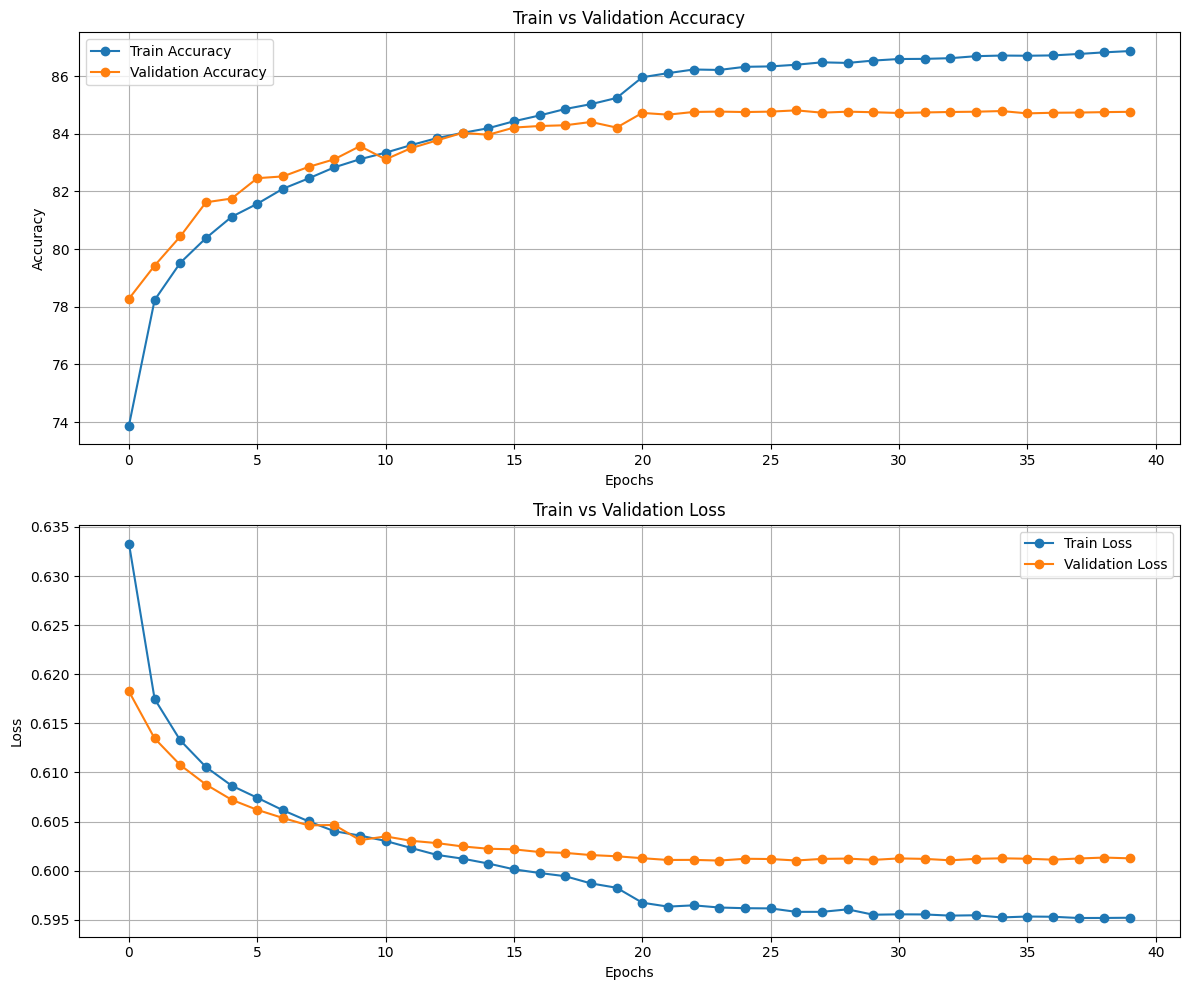

In [8]:
plot_train_val('../outputs/ultr_ips/out.log', '../outputs/ultr_ips/eval_train_val.jpg')

In [3]:
!pwd

/home/ec2-user/workspace/cf_rank


In [1]:
import torch.nn.functional as F

In [38]:
import torch
import torch.nn.functional as F

# Example ground truth and predicted probabilities
predicted_probs = torch.tensor([[0.1, 0.9], [0.8, 0.2]], requires_grad=True)
true_probs = torch.tensor([[0.15, 0.85], [0.6, 0.4]])

#predicted_probs = torch.tensor([0.9, 0.2, 0.7], requires_grad=True)
#true_probs = torch.tensor([0.95, 0.3, 0.5])

# KL Divergence expects the predicted distribution to be in log space
log_predicted_probs = torch.log(predicted_probs)

# Compute KL Divergence (reduction='batchmean' for averaging over batch size)
kl_div = F.kl_div(log_predicted_probs, true_probs, reduction='batchmean')

print("KL Divergence:", kl_div.item())

mse_loss = F.mse_loss(predicted_probs, true_probs)

print("MSE Loss:", mse_loss.item())

norm1 = torch.norm(predicted_probs- true_probs, p=1)

print("Norm 1:", norm1.item())

norm2 = torch.norm(predicted_probs- true_probs, p=2)

print("Norm 2:", norm2.item())


KL Divergence: 0.05844239890575409
MSE Loss: 0.02124999836087227
Norm 1: 0.4999999403953552
Norm 2: 0.29154759645462036


In [39]:
a1 = 0.5*torch.sum(torch.abs(predicted_probs - true_probs), dim=1).mean()

In [10]:
a1.sum(dim=1)

tensor([-1.1176e-08,  1.4901e-08], grad_fn=<SumBackward1>)

In [40]:
a1

tensor(0.1250, grad_fn=<MulBackward0>)

In [48]:
0.5*torch.abs(predicted_probs - true_probs).sum(dim=1).mean()

tensor(0.1250, grad_fn=<MulBackward0>)

In [35]:
predicted_probs = torch.tensor([0.9, 0.2], requires_grad=True)
true_probs = torch.tensor([0.85, 0.4])

In [36]:
a1 = 0.5*torch.abs(predicted_probs - true_probs).mean()

In [49]:
torch.abs(predicted_probs - true_probs)

tensor([[0.0500, 0.0500],
        [0.2000, 0.2000]], grad_fn=<AbsBackward0>)

In [50]:
a=torch.ones(1)

In [51]:
a.sum()

tensor(1.)

In [2]:
import torch
torch.randint(0,5,(1,))

tensor([4])

In [11]:
import numpy as np

In [13]:
np.random.randint(0,5)

2

In [35]:
org_scores = torch.rand(size=(2, 5))
print(org_scores)

tensor([[0.5024, 0.5385, 0.9201, 0.1433, 0.2778],
        [0.0480, 0.9475, 0.7595, 0.6388, 0.8571]])


In [36]:
scores = org_scores.unsqueeze(-1)
sorted = scores.sort(descending=True, dim=1)[0]
pairwise_diff = (scores.transpose(1, 2) - sorted).abs().pow(1.0).neg() / 1.0
P_hat = pairwise_diff.softmax(-1)

In [37]:
P_hat

tensor([[[0.1979, 0.2052, 0.3005, 0.1382, 0.1581],
         [0.2358, 0.2444, 0.1669, 0.1646, 0.1883],
         [0.2427, 0.2341, 0.1598, 0.1695, 0.1939],
         [0.2012, 0.1941, 0.1325, 0.2202, 0.2519],
         [0.1884, 0.1818, 0.1241, 0.2698, 0.2359]],

        [[0.1047, 0.2575, 0.2134, 0.1891, 0.2353],
         [0.1094, 0.2245, 0.2229, 0.1975, 0.2457],
         [0.1194, 0.2015, 0.2431, 0.2155, 0.2205],
         [0.1392, 0.1846, 0.2228, 0.2514, 0.2020],
         [0.3452, 0.1404, 0.1695, 0.1912, 0.1537]]])

In [38]:
from numbers import Number
from typing import Any, Callable

import torch
from torch import Tensor

LARGE_NEG_SOFTMAX_INPUT = -(6.5 * 10**4)

def soft_sort_group_parallel(
    s: Tensor, temperature: Number = 1.0, power: Number = 1.0, dummy_indices: Tensor = None
):

    if dummy_indices is None:
        dummy_indices = torch.zeros_like(s, dtype=bool)

    # Set dummy_indices in clone of s smaller than min
    s_clone = torch.clone(s)
    s_clone[dummy_indices] = s.min() - 1.0

    # Extract sorted non-dummy indices from s_clone
    # Sort currently does not support bool dtype on CUDA
    nondummy_perm_rows = ~(dummy_indices.float().sort(dim=-1).values.bool())
    s_sorted = s_clone.sort(descending=True, dim=-1).values

    # Expanding dummy_indices shape to match that of permutation matrix
    s_shape = dummy_indices.shape
    dummy_indices_unsqueezed = dummy_indices.unsqueeze(-2).expand(*s_shape, s_shape[-1])

    pairwise_distances = (s.unsqueeze(-2) - s_sorted.unsqueeze(-1)).abs().pow(
        power
    ).neg() / temperature
    # Set pairwise distance to dummy_indices as LARGE_NEG_SOFTMAX_INPUT
    pairwise_distances[dummy_indices_unsqueezed] = LARGE_NEG_SOFTMAX_INPUT

    perm_mat = torch.zeros_like(pairwise_distances)

    # Apply softmax only to non-dummy rows of pairwise distance matrix
    perm_mat[nondummy_perm_rows] = torch.nn.functional.softmax(
        pairwise_distances[nondummy_perm_rows], dim=-1
    )

    return perm_mat

In [93]:
dummy = torch.ones(2, 5, dtype=bool)
indices = torch.tensor([3,4])
for i, idx in enumerate(indices):
    dummy[i, :idx] = False
#dummy=None
a = soft_sort_group_parallel(org_scores, dummy_indices=dummy)

In [94]:
a

tensor([[[0.2813, 0.2916, 0.4271, 0.0000, 0.0000],
         [0.3644, 0.3777, 0.2579, 0.0000, 0.0000],
         [0.3812, 0.3677, 0.2511, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.1370, 0.3367, 0.2790, 0.2473, 0.0000],
         [0.1531, 0.2585, 0.3119, 0.2765, 0.0000],
         [0.1745, 0.2313, 0.2792, 0.3150, 0.0000],
         [0.4079, 0.1659, 0.2002, 0.2259, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]])

In [95]:
if a!=None:
    print('hello')

hello


In [96]:
a.shape

torch.Size([2, 5, 5])

In [76]:
from torch import nn

In [98]:
a1 = nn.Embedding(50,780)

In [100]:
a1.weight[:5,:].shape

torch.Size([5, 780])

In [102]:
c = torch.matmul(a,a1.weight[:5,:])

In [103]:
c.shape

torch.Size([2, 5, 780])

In [34]:
from src.losses import PiRankGPLoss, PiRankLoss

In [35]:
l1, l2 = PiRankLoss(), PiRankGPLoss()

In [48]:
import torch
a,b = torch.randint(0,2,size=(5,7), dtype=torch.float), torch.randint(0,2,size=(5,7), dtype=torch.float)

In [49]:
l2(a,b)

NameError: name 'l2' is not defined

In [50]:
a.view(-1)

tensor([0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.])

In [51]:
b

tensor([[1., 1., 0., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 0., 1.],
        [1., 1., 0., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0., 1., 1.],
        [1., 1., 1., 1., 0., 0., 1.]])

In [1]:
import jax.numpy as jnp
import rax

scores = jnp.array([1.1, 1.8, 3.4])  # output of a model.
labels = jnp.array([0.1,  0.5, 0.3])  # indicates doc 1 is relevant.

rax.ndcg_metric(scores, labels,topn=5, where=jnp.array([1,1,0]))  # computes a ranking metric.

ModuleNotFoundError: No module named 'jax'

In [55]:
jnp.int

Array([[1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 1.],
       [1., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 0., 0., 1.]], dtype=float32)

In [72]:
a1 = rax.ndcg_metric(jnp.array(a), jnp.array(b), where=jnp.zeros((5,7)))

In [5]:
 idx = torch.repeat_interleave(torch.arange(2), 5)

In [6]:
idx

tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [34]:
from torch import tensor
import torch
from torchmetrics.retrieval import RetrievalNormalizedDCG
indexes = tensor([0, 0, 0, 0, 0, 1,1,1,1,1])
preds = torch.tensor([.1, .2, .3, 4, 70, .1, .2, .3, 4, 70])
target = torch.tensor([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0])
ndcg = RetrievalNormalizedDCG(top_k=2)

In [35]:
ndcg(preds, target, indexes=idx)

tensor(0.8772)

In [69]:
def dcg(relevance, k, gain_fn='exp'):
    """
    Calculates the Discounted Cumulative Gain (DCG) at k.
    """
    
    def gain_function(relevance):
        if gain_fn=='exp':
            return 2 ** relevance - 1
        else:
            return relevance
    
    relevance = relevance[:k]
    dcg = gain_function(relevance[0]) + torch.sum(gain_function(relevance[1:]) / torch.log2(torch.arange(3, k+2)))
    return dcg

def ndcg(preds, target, k):
    """
    Calculates the Normalized Discounted Cumulative Gain (NDCG) at k.
    """
    relevance = target[torch.argsort(preds, descending=True)]
    
    ideal_relevance = torch.sort(target, descending=True)[0]
    
    actual_dcg = dcg(relevance, k, gain_fn='lin')
    ideal_dcg = dcg(ideal_relevance, k, gain_fn='lin')

    print(actual_dcg, ideal_dcg)
    
    if ideal_dcg == 0:
        return 0.0
    else:
        return actual_dcg / ideal_dcg

In [8]:
import torch

def dcg(relevance, k, mask=None, gain_fn='exp'):
    """
    Calculates the Discounted Cumulative Gain (DCG) at k for a batch of examples with masking support.
    Args:
        relevance (torch.Tensor): Tensor of shape (batch_size, num_items) representing relevance scores.
        k (int): Rank up to which DCG is calculated.
        mask (torch.Tensor): Optional mask of shape (batch_size, num_items) with 1 for valid items and 0 for invalid/padded items.
        gain_fn (str): The gain function to use ('exp' for exponential or 'lin' for linear).
    Returns:
        torch.Tensor: DCG values for each example in the batch.
    """
    def gain_function(rel):
        if gain_fn == 'exp':
            return 2 ** rel - 1
        return rel

    # Apply mask to relevance if provided
    # if mask is not None:
    #     relevance = relevance * mask

    # Take top-k relevance scores
    relevance = relevance[:, :k]

    # Compute log denominator
    log_factors = torch.log2(torch.arange(3, k + 2, device=relevance.device, dtype=relevance.dtype))

    # Compute DCG
    gains = gain_function(relevance)
    dcg = gains[:, 0] + torch.sum(gains[:, 1:] / log_factors, dim=1)
    return dcg


def ndcg(preds, target, k, mask=None, gain_fn='lin'):
    """
    Calculates the Normalized Discounted Cumulative Gain (NDCG) at k for a batch of examples with masking support.
    Args:
        preds (torch.Tensor): Predicted scores of shape (batch_size, num_items).
        target (torch.Tensor): Ground truth relevance scores of shape (batch_size, num_items).
        k (int): Rank up to which NDCG is calculated.
        mask (torch.Tensor): Optional mask of shape (batch_size, num_items) with 1 for valid items and 0 for invalid/padded items.
        gain_fn (str): The gain function to use ('exp' for exponential or 'lin' for linear).
    Returns:
        torch.Tensor: NDCG values for each example in the batch.
    """

    if mask is not None:
        mask = torch.where(mask == 0, -1e-8, mask)
        preds = preds*mask
        target = target*mask

    # Sort relevance scores based on predicted order
    sorted_indices = torch.argsort(preds, descending=True, dim=1)
    relevance = torch.gather(target, dim=1, index=sorted_indices)

    # Compute ideal DCG by sorting target relevance in descending order
    ideal_relevance = torch.sort(target, descending=True, dim=1)[0]
    ideal_mask = None
    
    # if mask is not None:
    #     ideal_mask = torch.sort(mask, descending=True, dim=1)[0]

    # Calculate DCG and ideal DCG
    actual_dcg = dcg(relevance, k, mask=mask, gain_fn=gain_fn)
    ideal_dcg = dcg(ideal_relevance, k, mask=ideal_mask, gain_fn=gain_fn)

    # Handle division by zero (when ideal_dcg is 0)
    print (actual_dcg,actual_dcg.mean(), ideal_dcg, ideal_dcg.mean())
    ndcg_values = actual_dcg / (ideal_dcg + 1e-8)
    ndcg_values[ideal_dcg == 0] = 0.0

    return ndcg_values

In [9]:
mask = torch.tensor([[1.0, 1.0, 1.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 0.0]])
#mask = torch.where(mask == 0, -1e-8, mask)

#preds = torch.tensor([[.1, .2, .3, 4, 70], [.1, .2, .3, 4, 70]])
#target = torch.tensor([[0.0, 1.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0, 1.0]])

preds = torch.tensor([[.1, .52, .3, 40, 7], [.6, .2, .5, 4, 70]])
target = torch.tensor([[0.0, 1.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0, 1.0]])

val = ndcg(preds, target, 5, mask=mask)
print(val, val.mean().item())

tensor([1.0000, 1.4307]) tensor(1.2153) tensor([1.0000, 1.6309]) tensor(1.3155)
tensor([1.0000, 0.8772]) 0.9386076927185059


In [4]:
preds*mask

tensor([[ 1.0000e-01,  2.0000e-01,  3.0000e-01, -4.0000e-08, -7.0000e-07],
        [ 1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e+00, -7.0000e-07]])

In [27]:
target*mask

tensor([[0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [62]:
dcg(target[torch.argsort(preds, descending=True)],5)

tensor(1.6309)

In [49]:
torch.sort(target, descending=True)

torch.return_types.sort(
values=tensor([1., 0., 0., 0., 0.]),
indices=tensor([4, 0, 1, 2, 3]))

In [41]:
import torch

# Define batch size (b) and block size (n)
b = 4  # Number of blocks
n = 5  # Size of each block

# Generate the tensor
tensor = torch.repeat_interleave(torch.arange(b), n)

# Print the result
print(tensor)


tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])


In [1]:
from datasets import load_dataset

test_dataset = load_dataset(
                    "philipphager/baidu-ultr_uva-mlm-ctr",
                    name="annotations",
                    split="test",
                    cache_dir="~/.cache/huggingface",
                )

/home/ec2-user/anaconda3/envs/rank3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating test split: 6985 examples [03:30, 33.14 examples/s]


In [2]:
test_dataset

Dataset({
    features: ['query_id', 'query_md5', 'query', 'query_length', 'frequency_bucket', 'n', 'text_md5', 'title', 'abstract', 'query_document_embedding', 'label', 'bm25', 'bm25_title', 'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short', 'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length', 'title_length', 'abstract_length'],
    num_rows: 6985
})

In [10]:
len(test_dataset['label'][1])

59

In [19]:
a = [1,2,3,4]

In [21]:
a[:10]

[1, 2, 3, 4]

In [32]:
print(torch.__file__)


/home/ec2-user/anaconda3/envs/rank3/lib/python3.9/site-packages/torch/__init__.py


In [1]:
%reload_ext tensorboard

In [12]:
import pandas as pd

def store_metrics(csv_file):
    """Reads a metrics.csv file from PyTorch Lightning and stores variables."""

    df = pd.read_csv(csv_file)

    # Create a dictionary to store variables
    metrics_dict = {}

    # Iterate over columns and store them as variables
    for col in df.columns:
        metrics_dict[col] = df[col].dropna().values

    return metrics_dict

# Example usage
metrics_file = '../outputs/rr_ips_soft/lightning_logs/version_0/metrics.csv'
metrics = store_metrics(metrics_file)

# Access a variable
print(metrics['train_loss'])

KeyError: 'train_loss'

In [13]:
metrics.keys()

dict_keys(['epoch', 'step', 'tr_TV_reward', 'tr_acc_ranker', 'tr_loss_ranker', 'tr_loss_reward', 'val_TV_reward', 'val_acc_ranker', 'val_loss_ranker'])

In [15]:
soft_position_ids=5
position_embeddings=8
embeddings=8
position_ids=0
examination=0
relevance=0
pred_scores=0
infer_ips=0

array([0.58994728, 0.55004579, 0.55546379, 0.55886757, 0.56451708,
       0.63897645])

In [ ]:
phat_mat = soft_position_ids
pos_emb_mat = position_embeddings.weight[1:phat_mat.shape[-1]+1,:]
soft_pos_mat = torch.matmul(phat_mat.permute(0,2,1), pos_emb_mat)
position_embeddings = soft_pos_mat

In [ ]:
position_embeddings = position_embeddings(position_ids) # N*h_dim
embeddings += position_embeddings

In [ ]:
prob_click = examination * torch.sigmoid(relevance)
prob_noclick = torch.prod(1-prob_click, dim=1)
prob_atleast_1click = 1 - prob_noclick
avg_click = prob_atleast_1click

In [ ]:
pred_scores = pred_scores * torch.tensor(batch['mask'])

pred_scores_padded = torch.where(pred_scores==0, -8e+8, pred_scores)

sorted_indices = torch.argsort(pred_scores_padded, dim=1, descending=True)
new_positions = torch.empty_like(sorted_indices)
new_positions.scatter_(1, sorted_indices, 
                       torch.arange(pred_scores.size(1)).unsqueeze(0).expand_as(pred_scores))

examination, relevance = infer_ips(pos_idx=new_positions)
prob_click = examination * torch.sigmoid(relevance)
prob_noclick = torch.prod(1-prob_click, dim=1)
prob_atleast_1click = 1 - prob_noclick

ret_score = prob_atleast_1click.mean()

/home/gaurav/anaconda3/envs/conceptor/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


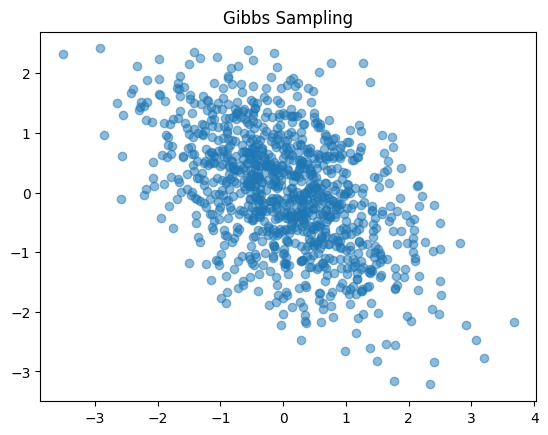

In [1]:
import torch

# Define a toy bivariate Gaussian
mu = torch.tensor([0.0, 0.0])
cov = torch.tensor([[1.0, 0.5], [0.5, 1.0]])
precision = torch.inverse(cov)

# Parameters
n_samples = 1000
samples = torch.zeros((n_samples, 2))

# Initialize
x = torch.tensor([0.0, 0.0])

for i in range(n_samples):
    # Sample x1 given x2
    mu1 = mu[0] + precision[0, 1] / precision[1, 1] * (x[1] - mu[1])
    sigma1 = (1.0 / precision[0, 0]) ** 0.5
    x[0] = torch.normal(mu1, sigma1)
    
    # Sample x2 given x1
    mu2 = mu[1] + precision[1, 0] / precision[0, 0] * (x[0] - mu[0])
    sigma2 = (1.0 / precision[1, 1]) ** 0.5
    x[1] = torch.normal(mu2, sigma2)
    
    samples[i] = x

# Visualization
import matplotlib.pyplot as plt
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.title("Gibbs Sampling")
plt.show()


In [2]:
# Target distribution: standard Gaussian
def target_distribution(x):
    return torch.exp(-0.5 * x**2) / torch.sqrt(2 * torch.pi)

# Metropolis-Hastings
n_samples = 1000
samples = []
x = 0.0  # Initial sample

for _ in range(n_samples):
    # Propose new sample
    x_new = x + torch.normal(0, 1.0)
    
    # Acceptance probability
    accept_ratio = target_distribution(x_new) / target_distribution(x)
    if torch.rand(1) < accept_ratio:
        x = x_new
    
    samples.append(x)

# Visualization
plt.hist(samples, bins=30, density=True, alpha=0.7, label="Samples")
x_vals = torch.linspace(-4, 4, 100)
plt.plot(x_vals, target_distribution(x_vals), label="Target PDF")
plt.legend()
plt.title("Metropolis-Hastings")
plt.show()



TypeError: normal() received an invalid combination of arguments - got (int, float), but expected one of:
 * (Tensor mean, Tensor std, *, torch.Generator generator, Tensor out)
 * (Tensor mean, float std, *, torch.Generator generator, Tensor out)
 * (float mean, Tensor std, *, torch.Generator generator, Tensor out)
 * (float mean, float std, tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


In [3]:
# Target distribution: standard Gaussian
def target_distribution(x):
    return torch.exp(-0.5 * x**2) / torch.sqrt(2 * torch.pi)

# Proposal distribution: uniform [-3, 3]
proposal_distribution = lambda x: torch.ones_like(x) / 6.0

# Samples from proposal
n_samples = 1000
proposal_samples = torch.rand(n_samples) * 6 - 3  # Uniform [-3, 3]

# Weights
weights = target_distribution(proposal_samples) / proposal_distribution(proposal_samples)
weights /= torch.sum(weights)  # Normalize

# Estimate expectation of f(x) = x^2
f_x = proposal_samples**2
expectation = torch.sum(weights * f_x)
print(f"Estimated Expectation: {expectation}")

# Visualization
plt.hist(proposal_samples, bins=30, density=True, alpha=0.5, label="Proposal Samples")
x_vals = torch.linspace(-4, 4, 100)
plt.plot(x_vals, target_distribution(x_vals), label="Target PDF")
plt.legend()
plt.title("Importance Sampling")
plt.show()


TypeError: sqrt(): argument 'input' (position 1) must be Tensor, not float

In [1]:
import torch

/home/gaurav/anaconda3/envs/conceptor/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
a = torch.rand((2,3)).cuda()

In [24]:
a.repeat(10,1,1)

tensor([[[0.1398, 0.6808, 0.5212, 0.0817],
         [0.0480, 0.0844, 0.9930, 0.6513],
         [0.9937, 0.3889, 0.6241, 0.8342]],

        [[0.6115, 0.9757, 0.1038, 0.9804],
         [0.1185, 0.2006, 0.3513, 0.8719],
         [0.1940, 0.0099, 0.3177, 0.4005]],

        [[0.1398, 0.6808, 0.5212, 0.0817],
         [0.0480, 0.0844, 0.9930, 0.6513],
         [0.9937, 0.3889, 0.6241, 0.8342]],

        [[0.6115, 0.9757, 0.1038, 0.9804],
         [0.1185, 0.2006, 0.3513, 0.8719],
         [0.1940, 0.0099, 0.3177, 0.4005]],

        [[0.1398, 0.6808, 0.5212, 0.0817],
         [0.0480, 0.0844, 0.9930, 0.6513],
         [0.9937, 0.3889, 0.6241, 0.8342]],

        [[0.6115, 0.9757, 0.1038, 0.9804],
         [0.1185, 0.2006, 0.3513, 0.8719],
         [0.1940, 0.0099, 0.3177, 0.4005]],

        [[0.1398, 0.6808, 0.5212, 0.0817],
         [0.0480, 0.0844, 0.9930, 0.6513],
         [0.9937, 0.3889, 0.6241, 0.8342]],

        [[0.6115, 0.9757, 0.1038, 0.9804],
         [0.1185, 0.2006, 0.3513, 0.8719

In [27]:
b = [a,a,a]

In [35]:
b*3

[tensor([[0.1028, 0.2658, 0.5315],
         [0.1084, 0.0623, 0.4110]], device='cuda:0'),
 tensor([[0.1028, 0.2658, 0.5315],
         [0.1084, 0.0623, 0.4110]], device='cuda:0'),
 tensor([[0.1028, 0.2658, 0.5315],
         [0.1084, 0.0623, 0.4110]], device='cuda:0'),
 tensor([[0.1028, 0.2658, 0.5315],
         [0.1084, 0.0623, 0.4110]], device='cuda:0'),
 tensor([[0.1028, 0.2658, 0.5315],
         [0.1084, 0.0623, 0.4110]], device='cuda:0'),
 tensor([[0.1028, 0.2658, 0.5315],
         [0.1084, 0.0623, 0.4110]], device='cuda:0'),
 tensor([[0.1028, 0.2658, 0.5315],
         [0.1084, 0.0623, 0.4110]], device='cuda:0'),
 tensor([[0.1028, 0.2658, 0.5315],
         [0.1084, 0.0623, 0.4110]], device='cuda:0'),
 tensor([[0.1028, 0.2658, 0.5315],
         [0.1084, 0.0623, 0.4110]], device='cuda:0')]

In [18]:
b = torch.tensor([0.0], requires_grad=True).to(a.device)

In [3]:
import torch

def clamp_probs(probs, eps=1e-8):
    return torch.clamp(probs, eps, 1 - eps)

class PlackettLuce(object):
    """
        A simplified version of Plackett-Luce distribution from existing unmerged PyTorch implementation
        https://github.com/jeremysalwen/pytorch/blob/6c35b078bf67c028977089011c0aa8868ec544e3/torch/distributions/plackett_luce.py
    """

    @staticmethod
    def sample(logits: torch.Tensor, num_samples: int = 1, temp: float = 1.0):
        """
        Returns a 2d tensor (num_samples, num_logits) of sample permutation using Gumbel-max trick to avoid cycles
        Args:
            logits Tensor (num_logits, )
        """
        with torch.no_grad():
            logits = logits.expand(num_samples, -1)
            u = clamp_probs(torch.rand_like(logits))
            z = logits - torch.log(-torch.log(u)) * temp
            sample = torch.sort(z, descending=True, dim=1)[1].detach()
        return sample
    
    @staticmethod
    def log_prob(logits: torch.Tensor, sample: torch.Tensor, temp: float = 1.0):
        """
        Returns a 2d tensor (num_samples, num_logits) of log P(A_j|A_1:j-1)
        Args:
            sample Tensor (num_samples, num_logits): num_samples permutations
        """
        logits_ranked = logits.gather(1,sample) / temp
        reverse_logcumsumexp = torch.flip(torch.logcumsumexp(logits_ranked.flip(dims=[1]), dim=1), dims=[1])
        logp = logits_ranked - reverse_logcumsumexp
        return logp

/home/gaurav/anaconda3/envs/conceptor/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
a1 = torch.rand((3,4))
fun = PlackettLuce()
a2 = fun.sample(logits=a1, num_samples=3)

In [10]:
a2 = fun.sample(logits=a1, num_samples=3)

In [22]:
fun.log_prob(logits=a1, sample=1)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [9]:
a1

tensor([[0.4777, 0.2256, 0.9544, 0.1292],
        [0.0945, 0.6971, 0.3400, 0.9335],
        [0.2417, 0.2647, 0.9227, 0.1527]])

In [22]:
a2

tensor([[1, 2, 3, 0],
        [3, 1, 2, 0],
        [2, 3, 0, 1]])

In [14]:
a1.gather(1,a2)

tensor([[0.2256, 0.9544, 0.1292, 0.4777],
        [0.9335, 0.6971, 0.3400, 0.0945],
        [0.9227, 0.1527, 0.2417, 0.2647]])

In [19]:
torch.logsumexp(a1.gather(1,a2),1)

tensor([1.8871, 1.9538, 1.8338])

In [2]:
import pandas as pd
df_examples = pd.read_parquet('../data/esci-data/shopping_queries_dataset/shopping_queries_dataset_examples.parquet')
df_products = pd.read_parquet('../data/esci-data/shopping_queries_dataset/shopping_queries_dataset_products.parquet')
df_sources = pd.read_csv("../data/esci-data/shopping_queries_dataset/shopping_queries_dataset_sources.csv")

In [4]:
df_sources

,query_id,source
0,0,other
1,1,negations
2,2,negations
3,3,negations
4,4,behavioral
...,...,...
130647,130647,other
130648,130648,other
130649,130649,other
130650,130650,other


In [2]:
df_examples_products = pd.merge(
    df_examples,
    df_products,
    how='left',
    left_on=['product_locale','product_id'],
    right_on=['product_locale', 'product_id']
)

In [3]:
df_task_1 = df_examples_products[df_examples_products["small_version"] == 1]
df_task_1_train = df_task_1[df_task_1["split"] == "train"]
df_task_1_test = df_task_1[df_task_1["split"] == "test"]


In [4]:
df_examples_products

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split,product_title,product_description,product_bullet_point,product_brand,product_color
0,0,revent 80 cfm,0,B000MOO21W,us,I,0,1,train,Panasonic FV-20VQ3 WhisperCeiling 190 CFM Ceil...,None,WhisperCeiling fans feature a totally enclosed...,Panasonic,White
1,1,revent 80 cfm,0,B07X3Y6B1V,us,E,0,1,train,Homewerks 7141-80 Bathroom Fan Integrated LED ...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,80 CFM
2,2,revent 80 cfm,0,B07WDM7MQQ,us,E,0,1,train,Homewerks 7140-80 Bathroom Fan Ceiling Mount E...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,White
3,3,revent 80 cfm,0,B07RH6Z8KW,us,E,0,1,train,Delta Electronics RAD80L BreezRadiance 80 CFM ...,This pre-owned or refurbished product has been...,Quiet operation at 1.5 sones\nBuilt-in thermos...,DELTA ELECTRONICS (AMERICAS) LTD.,White
4,4,revent 80 cfm,0,B07QJ7WYFQ,us,E,0,1,train,Panasonic FV-08VRE2 Ventilation Fan with Reces...,None,The design solution for Fan/light combinations...,Panasonic,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621283,2621283,�����j�[�h�p�[�x abrasus,130651,B0063ASUY4,jp,E,0,1,test,薄い財布 abrAsus ブッテーロレザーエディション ブラック,2013年グッドデザイン賞受賞。<br/> 「薄い財布abrAsus」は、財布をゼロベースで...,イタリア産の上質なヌメ革を使用した最上級ブッテーロレザーエディション。\nグッドデザイン賞を...,abrAsus(アブラサス),ブラック
2621284,2621284,�����j�[�h�p�[�x abrasus,130651,B0062EZYIG,jp,E,0,1,test,アブラサス (abrAsus) 薄い財布 ブラック,グッドデザイン賞受賞。 <br /> 「薄い財布abrAsus」は、財布をゼロベースで考えた...,グッドデザイン賞を受賞しました。\n特別な構造（特許取得済み）で、圧倒的な薄さを実現しました...,abrAsus(アブラサス),ブラック
2621285,2621285,�����j�[�h�p�[�x abrasus,130651,B07H8MWBZN,jp,S,0,1,test,Bellroy Hide & Seek Wallet - スリムなレザー製二つ折り財布、RF...,<b>スリムな財布へ</b><br> ベルロイは、毎日の必需品をスマートに持ち運べる製品の開...,ポケットをフラットに保てるスリムなシルエットかつクラシックなデザイン\nRFID保護（スキミ...,Bellroy(ベルロイ),Black - RFID (New)
2621286,2621286,�����j�[�h�p�[�x abrasus,130651,B00IZH4T9S,jp,E,0,1,test,小さい小銭入れ abrAsus (アブラサス) ダークグリーン,<b>「コイン」「紙幣」「キー」だけを持ち運ぶ キーホルダーみたいな財布</b> <br> ...,「コイン」「紙幣」「キー」だけを一緒に持ち歩く、キーホルダーのような財布です。\n500円玉...,abrAsus(アブラサス),ダークグリーン
